## Notebook Overview: Data Cleaning and Filtering for Dock Casts

This notebook is designed to preprocess and filter CTD (Conductivity, Temperature, Depth) cast data collected during fieldwork. It focuses on isolating only those measurements taken within a defined dock region using spatial filtering.

### Objectives:
- **Define Dock Region**: A polygon boundary is defined using `shapely` to spatially represent the dock area.
- **Data Ingestion**: Multiple CSV files containing CTD cast data are read and merged into a single DataFrame.
- **Geospatial Filtering**: Each cast's latitude and longitude is checked to determine whether it falls within the dock polygon.
- **Data Cleaning**: Casts outside the dock region are discarded, and the cleaned data is saved or used for further analysis.

This process ensures that only relevant measurements from within the dock area are retained for analysis and modeling in later stages.

In [1]:
# . . . Import packages

import os
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [4]:
# . . . . . TESTING 5/13 DATA FOR PROCESSING

# Define the dock polygon using (longitude, latitude)
dock_polygon = Polygon([
    (-106.854340, 40.283481),
    (-106.854101, 40.283199),
    (-106.853171, 40.283739),
    (-106.853466, 40.283944)
])

# Path to folder for 5/13 data (test)
base_folder = '/content/drive/MyDrive/Field_Camp /dock/5_15'

# Initialize counter and results list
dock_count = 0
dock_casts_metadata = []

# Loop through all CSV files in the folder
for fname in os.listdir(base_folder):
    if not fname.endswith('.csv'):
        continue

    fpath = os.path.join(base_folder, fname)

    # Read file and extract metadata
    metadata = {}
    try:
        with open(fpath, 'r') as file:
            for line in file:
                if line.startswith('%'):
                    parts = line.strip('% \n').split(',', 1)
                    if len(parts) == 2:
                        key, value = parts
                        metadata[key.strip()] = value.strip()
                elif line.strip() == '':
                    continue
                else:
                    break  # End of metadata section
    except Exception as e:
        print(f"⚠️ Error reading {fname}: {e}")
        continue

    # Extract coordinates
    try:
        lat = float(metadata.get('Start latitude', 'nan'))
        lon = float(metadata.get('Start longitude', 'nan'))
    except ValueError:
        continue

    # Check if point falls within dock polygon
    point = Point(lon, lat)
    if dock_polygon.contains(point):
        dock_count += 1
        dock_casts_metadata.append({
            'Filename': fname,
            'Cast Time (UTC)': metadata.get('Cast time (UTC)', 'Unknown'),
            'Latitude': lat,
            'Longitude': lon
        })

# Report results
print(f"✅ Found {dock_count} casts within dock polygon on 5/13.")

# Display results if any
if dock_casts_metadata:
    dock_df = pd.DataFrame(dock_casts_metadata)
    display(dock_df)
else:
    print("❌ No matching casts found.")

✅ Found 10 casts within dock polygon on 5/13.


,Filename,Cast Time (UTC),Latitude,Longitude
0,CC2435009_20250515_180950.csv,2025-05-15 18:09:50,40.283627,-106.853471
1,CC2435009_20250515_213650.csv,2025-05-15 21:36:50,40.283643,-106.853450
2,CC2435009_20250515_175944.csv,2025-05-15 17:59:44,40.283454,-106.853738
3,CC2435009_20250515_175044.csv,2025-05-15 17:50:44,40.283278,-106.854047
4,CC2435009_20250515_175623.csv,2025-05-15 17:56:23,40.283279,-106.854031
5,CC2435009_20250515_200555.csv,2025-05-15 20:05:55,40.283645,-106.853464
6,CC2435009_20250515_213542.csv,2025-05-15 21:35:42,40.283467,-106.853734
7,CC2435009_20250515_200231.csv,2025-05-15 20:02:31,40.283279,-106.854016
8,CC2435009_20250515_192831.csv,2025-05-15 19:28:31,40.283442,-106.853746
9,CC2435009_20250515_213434.csv,2025-05-15 21:34:34,40.283243,-106.854050


In [ ]:
# . . . . TESTING ALL DATES


# Define the dock polygon using (longitude, latitude)
dock_polygon = Polygon([
    (-106.854340, 40.283481),
    (-106.854101, 40.283199),
    (-106.853171, 40.283739),
    (-106.853466, 40.283944)
])

# Define base path to the dock directory (all 5_13 to 5_19 folders)
dock_base_path = '/content/drive/MyDrive/Field_Camp /dock'

# Folders to search
day_folders = [f'5_{day}' for day in range(13, 20)]

# Initialize counter and results
dock_casts = []
total_casts_in_polygon = 0

# Loop through each folder
for folder in day_folders:
    folder_path = os.path.join(dock_base_path, folder)
    if not os.path.isdir(folder_path):
        print(f"⚠️ Skipping missing folder: {folder_path}")
        continue

    for fname in os.listdir(folder_path):
        if not fname.endswith('.csv'):
            continue

        fpath = os.path.join(folder_path, fname)

        # Read metadata
        metadata = {}
        try:
            with open(fpath, 'r') as file:
                for line in file:
                    if line.startswith('%'):
                        parts = line.strip('% \n').split(',', 1)
                        if len(parts) == 2:
                            key, value = parts
                            metadata[key.strip()] = value.strip()
                    elif line.strip() == '':
                        continue
                    else:
                        break
        except Exception as e:
            print(f"⚠️ Error reading {fname}: {e}")
            continue

        # Extract lat/lon and check if in polygon
        try:
            lat = float(metadata.get('Start latitude', 'nan'))
            lon = float(metadata.get('Start longitude', 'nan'))
        except ValueError:
            continue

        point = Point(lon, lat)
        if dock_polygon.contains(point):
            total_casts_in_polygon += 1
            dock_casts.append({
                'Filename': fname,
                'Folder': folder,
                'Cast Time (UTC)': metadata.get('Cast time (UTC)', 'Unknown'),
                'Latitude': lat,
                'Longitude': lon
            })

# Report total
print(f"✅ Total dock casts found across all folders: {total_casts_in_polygon}")

# Optionally display or save the results
if dock_casts:
    dock_df = pd.DataFrame(dock_casts)
    display(dock_df)
    # Uncomment to save results:
    # dock_df.to_csv('/content/dock_casts.csv', index=False)
else:
    print("❌ No casts found within polygon.")

In [ ]:
# . . . . . COMBINE ALL DOCK POINTS TO SINGLE FILE

# Initialize final combined DataFrame
combined_df = pd.DataFrame()

for entry in dock_casts:
    folder = entry['Folder']
    fname = entry['Filename']
    fpath = os.path.join(dock_base_path, folder, fname)

    try:
        # Skip metadata rows and find header
        with open(fpath, 'r') as file:
            lines = file.readlines()
            header_index = next(i for i, line in enumerate(lines) if not line.startswith('%') and ',' in line)

        # Load only the data section using pandas
        cast_df = pd.read_csv(fpath, skiprows=header_index)
        cast_df['Filename'] = fname
        cast_df['Folder'] = folder
        cast_df['Cast Time (UTC)'] = entry.get('Cast Time (UTC)', 'Unknown')
        cast_df['Latitude'] = entry['Latitude']
        cast_df['Longitude'] = entry['Longitude']

        # Append to master frame
        combined_df = pd.concat([combined_df, cast_df], ignore_index=True)

    except Exception as e:
        print(f"⚠️ Failed to read data from {fname}: {e}")

# Save to CSV
output_path = '/content/drive/MyDrive/Field_Camp /dock/dock_casts_combined_50.csv'
combined_df.to_csv(output_path, index=False)
print(f"✅ Saved combined CTD data for dock casts to: {output_path}")

<ipython-input-3-4a141102fcb5>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, cast_df], ignore_index=True)


✅ Saved combined CTD data for dock casts to: /content/drive/MyDrive/Field_Camp /dock/dock_casts_combined_50.csv


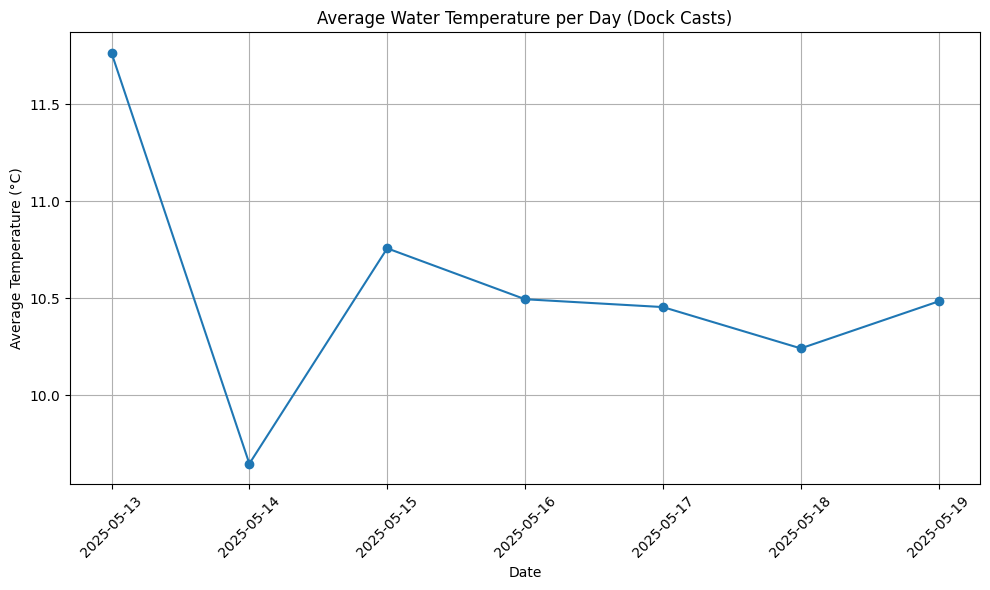

(49,
     Cast Date  Temperature (Celsius)
 0  2025-05-13              11.763805
 1  2025-05-14               9.647674
 2  2025-05-15              10.757027
 3  2025-05-16              10.494853
 4  2025-05-17              10.454505
 5  2025-05-18              10.241653
 6  2025-05-19              10.483914)

In [ ]:
# . . . . PLOTTING ALL TEMP AVERAGE (CHECKING CSV FORMAT)

# Load the new CSV file
file_path = '/content/drive/MyDrive/Field_Camp /dock/dock_casts_combined_50.csv'
df = pd.read_csv(file_path)

# Display basic info to check structure and count unique files (should be 50)
unique_casts = df['Filename'].nunique()

# Convert cast time to datetime for grouping
df['Cast Time (UTC)'] = pd.to_datetime(df['Cast Time (UTC)'], errors='coerce')

# Extract date portion only
df['Cast Date'] = df['Cast Time (UTC)'].dt.date

# Group by date and calculate mean temperature
avg_temp_by_date = df.groupby('Cast Date')['Temperature (Celsius)'].mean().reset_index()

# Plot average temperature per day
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_date['Cast Date'], avg_temp_by_date['Temperature (Celsius)'], marker='o')
plt.title('Average Water Temperature per Day (Dock Casts)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(unique_casts, avg_temp_by_date)

In [ ]:
# . . . . ADD DISTINCT CAST ID TO CSV FOR MANUAL PICKING IDENTIFICATION

# Define the dock polygon
dock_polygon = Polygon([
    (-106.854340, 40.283481),
    (-106.854101, 40.283199),
    (-106.853171, 40.283739),
    (-106.853466, 40.283944)
])

# Directory structure: each folder named 5_13, 5_14, ..., 5_19
base_dir = "/content/drive/MyDrive/Field_Camp /dock"
day_folders = [f"5_{i}" for i in range(13, 20)]

# Store matching casts
matching_casts = []

# Loop through all folders and files
for folder in day_folders:
    folder_path = os.path.join(base_dir, folder)
    for fname in os.listdir(folder_path):
        if fname.endswith(".csv"):
            fpath = os.path.join(folder_path, fname)
            try:
                # Read metadata lines
                with open(fpath, 'r') as f:
                    lines = f.readlines()
                metadata = {}
                for line in lines:
                    if line.startswith('%'):
                        parts = line.strip('% \n').split(',', 1)
                        if len(parts) == 2:
                            metadata[parts[0].strip()] = parts[1].strip()
                    elif line.strip().startswith("Pressure"):
                        break  # Stop at data
                lat = float(metadata.get("Start latitude", "nan"))
                lon = float(metadata.get("Start longitude", "nan"))
                point = Point(lon, lat)

                if dock_polygon.contains(point):
                    df = pd.read_csv(fpath, skiprows=lines.index(line))
                    df["Cast ID"] = fname  # Label with file source
                    for k, v in metadata.items():
                        df[k] = v
                    matching_casts.append(df)

            except Exception as e:
                print(f"⚠️ Failed to process {fname}: {e}")

# Combine and save
if matching_casts:
    combined_df = pd.concat(matching_casts, ignore_index=True)
    combined_df.to_csv("/content/drive/MyDrive/Field_Camp /dock/dock_casts_with_ids.csv", index=False)
    print("✅ Saved filtered dock casts with Cast IDs to dock_casts_with_ids.csv")
else:
    print("❌ No casts matched the polygon.")

<ipython-input-5-bb1d607b9924>:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(matching_casts, ignore_index=True)


✅ Saved filtered dock casts with Cast IDs to dock_casts_with_ids.csv


# The below code provides plots of the extracted points at the dock location and adds them to a TIFF file for visual representation

In [ ]:
!pip install geopandas rasterio --quiet
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import rasterio
from rasterio.plot import show
import matplotlib.ticker as mticker
import numpy as np
from sklearn.cluster import DBSCAN
import os

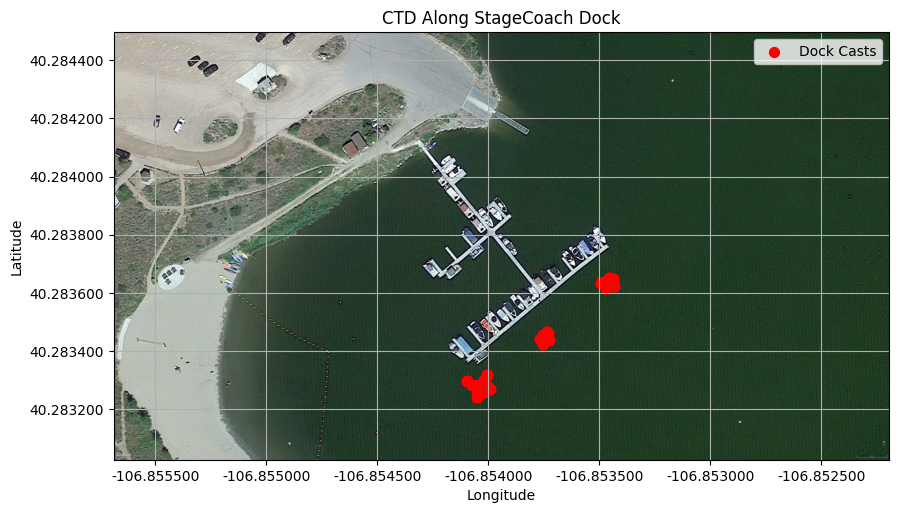

In [ ]:
# Load dock casts data
csv_path = "/content/drive/MyDrive/Field_Camp /dock/dock_casts_with_ids.csv"
df = pd.read_csv(csv_path)

# Rescale if necessary
if df["Start latitude"].abs().max() > 90:
    df["Start latitude"] = df["Start latitude"] / 1e7
    df["Start longitude"] = df["Start longitude"] / 1e7

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df["Start longitude"], df["Start latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Load GeoTIFF image
tiff_path = "/content/drive/MyDrive/Field_Camp /StageCoach_Dock_GeoTIFF.tif"
raster = rasterio.open(tiff_path)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
show(raster, ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=50, label='Dock Casts')

# Format axes to show full decimal degrees
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.6f}"))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.6f}"))

ax.set_title("CTD Along StageCoach Dock")
ax.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
# . . . . SAVING A DOCK LOCATION TO CSV

# Load your dock data CSV
df = pd.read_csv("/content/drive/MyDrive/Field_Camp /dock/dock_casts_with_ids.csv")

# Parse and format datetime
df['Cast time (UTC)'] = pd.to_datetime(df['Cast time (UTC)'], errors='coerce')
df['Cast Date'] = df['Cast time (UTC)'].dt.date

# Extract and filter coordinates
coords = df[['Start latitude', 'Start longitude']].dropna().to_numpy()

# Cluster based on proximity using DBSCAN
clustering = DBSCAN(eps=0.0005, min_samples=1).fit(coords)
df['Dock Cluster'] = clustering.labels_
df['Dock Location'] = df['Dock Cluster'].apply(lambda x: f"Dock_{x + 1}")

# Add combined label for sorting and future filtering
df["Date_Dock_Label"] = df["Cast Date"].astype(str) + "_" + df["Dock Location"]

# Save full labeled file
output_path = "/content/drive/MyDrive/Field_Camp /dock/dock_casts_labeled_by_date_and_location.csv"
df.to_csv(output_path, index=False)

# Show output path
print("✅ File saved:", output_path)

✅ File saved: /content/drive/MyDrive/Field_Camp /dock/dock_casts_labeled_by_date_and_location.csv


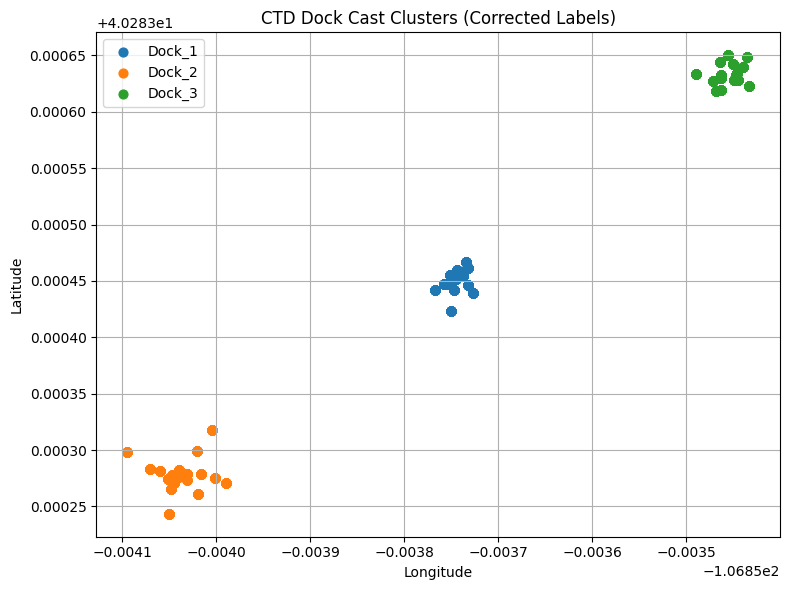

In [ ]:
# . . . . PLOTTING FOR VERIFICATION

# Load data
df = pd.read_csv("/content/drive/MyDrive/Field_Camp /dock/dock_casts_with_ids.csv")
df = df.dropna(subset=['Start latitude', 'Start longitude'])

# Convert lat/lon to radians for haversine clustering
coords_deg = df[['Start latitude', 'Start longitude']].values
coords_rad = np.radians(coords_deg)

# Use DBSCAN with haversine distance (~20m radius = 0.00018 radians)
kms_per_radian = 6371.0088
epsilon_km = 0.02  # 20 meters
epsilon_rad = epsilon_km / kms_per_radian
clustering = DBSCAN(eps=epsilon_rad, min_samples=2, metric='haversine').fit(coords_rad)

# Add results
df['Dock Cluster'] = clustering.labels_
df['Dock Location'] = df['Dock Cluster'].apply(lambda x: f'Dock_{x + 1}' if x >= 0 else 'Unclustered')

# ✅ Plot each cluster with a unique color and label
plt.figure(figsize=(8, 6))
for label, group in df.groupby('Dock Location'):
    plt.scatter(group['Start longitude'], group['Start latitude'], label=label, s=40)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("CTD Dock Cast Clusters (Corrected Labels)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Save to new CSV with dock clustering
output_path = "/content/drive/MyDrive/Field_Camp /dock/dock_casts_with_dock_labels.csv"
df.to_csv(output_path, index=False)

print(f"✅ Saved: {output_path}")

✅ Saved: /content/drive/MyDrive/Field_Camp /dock/dock_casts_with_dock_labels.csv
